In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv


In [2]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

# Load the dataset (replace 'dataset_path' with the actual path to the dataset)
dataset_path = "/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv"
data = pd.read_csv(dataset_path)

# Separate the features (X) and the target variable (y)
X = data.drop(columns=['target'])
y = data['target']

# Initialize the Min-Max scaler
scaler = MinMaxScaler()

# Fit and transform the data
X_scaled = scaler.fit_transform(X)

# Select the top K features using SelectKBest and chi-squared test
k = 11  # Number of top features to select
best_features = SelectKBest(score_func=chi2, k=k).fit(X_scaled, y)

# Get the scores and p-values of the selected features
feature_scores = best_features.scores_
feature_pvalues = best_features.pvalues_

# Get the indices of the selected features
selected_feature_indices = best_features.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_feature_indices]

# Create a DataFrame to display feature names, scores, and p-values
feature_info_df = pd.DataFrame({'Feature': selected_features, 'Score': feature_scores, 'P-Value': feature_pvalues})

# Print the selected feature names along with their scores and p-values
print("Selected Features with Scores and P-Values:")
print(feature_info_df)


Selected Features with Scores and P-Values:
                Feature       Score       P-Value
0                   age    5.672766  1.723027e-02
1                   sex   27.225253  1.810780e-07
2       chest pain type   32.888249  9.761149e-09
3          resting bp s    0.223758  6.361916e-01
4           cholesterol    3.793855  5.144106e-02
5   fasting blood sugar   43.951531  3.366090e-11
6           resting ecg    3.442291  6.354750e-02
7        max heart rate   11.679452  6.319413e-04
8       exercise angina  168.989554  1.229877e-38
9               oldpeak    7.183735  7.356742e-03
10             ST slope   23.244320  1.426712e-06


In [3]:
# select by rank

# Set a threshold for p-values
p_value_threshold = 0.01  

# Select features with p-values below the threshold
selected_features = feature_info_df[feature_info_df['P-Value'] < p_value_threshold]['Feature']
print(selected_features)

1                     sex
2         chest pain type
5     fasting blood sugar
7          max heart rate
8         exercise angina
9                 oldpeak
10               ST slope
Name: Feature, dtype: object


In [4]:
# p = 0.01
# sex, chest pain type, fasting blood sugar, max heart rate, exercise angina, oldpeak, ST slope
# p = 0.001, 0.005
# sex, chest pain type, fasting blood sugar, max heart rate, exercise angina, ST slope

# columns_to_drop_s = ["age", "resting bp s", "cholesterol", "resting ecg", "target"]
# columns_to_drop_mw = ["age", "resting bp s", "cholesterol", "resting ecg", "oldpeak", "target"]


**Logistic Regression**

Training Accuracy: 0.8287815126050421
Testing Accuracy: 0.8571428571428571


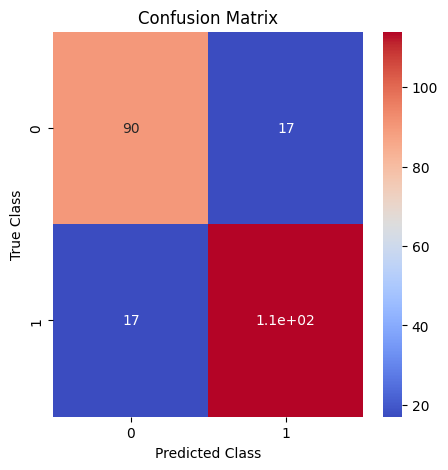

Precision: 0.8702290076335878
Sensitivity: 0.8702290076335878
Specificity: 0.8411214953271028
F1-score: 0.8702290076335878


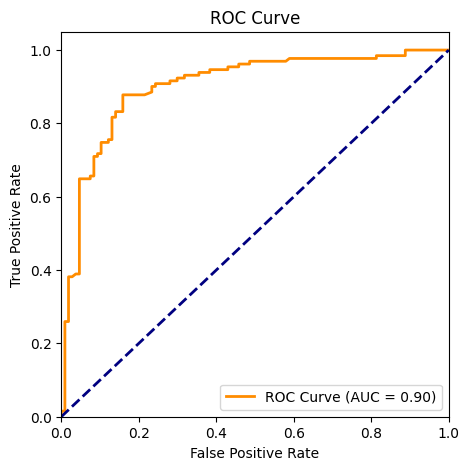

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop_s = ["age", "resting bp s", "cholesterol", "resting ecg", "target"]
columns_to_drop_mw = ["age", "resting bp s", "cholesterol", "resting ecg", "oldpeak", "target"]
X = data.drop(columns_to_drop_mw, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = logistic_model.predict(X_train)
y_test_pred = logistic_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, logistic_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**Multiple Regression**

Accuracy: 0.592436974789916


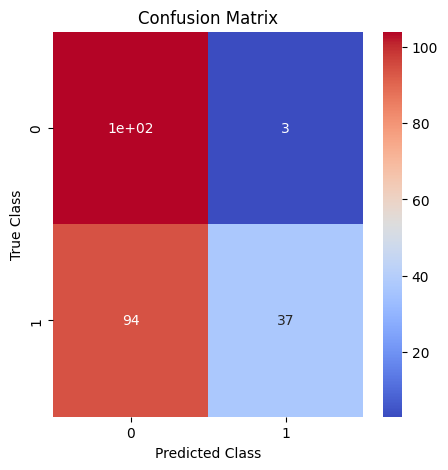

Precision: 0.925
Sensitivity: 0.2824427480916031
Specificity: 0.9719626168224299
F1-score: 0.4327485380116959


In [6]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop_1 = ["sex", "chest pain type", "fasting blood sugar", "max heart rate", "exercise angina", "oldpeak", "ST slope", "target"]
columns_to_drop_2 = ["sex", "chest pain type", "fasting blood sugar", "max heart rate", "exercise angina", "ST slope", "target"]
X = data.drop(columns_to_drop_2, axis=1)
y = data["target"]

# train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train the model
regr = linear_model.LinearRegression()
regr.fit(X, y)

# predictions on the test set
y_pred = regr.predict(X_test)

# applying a threshold of 0.8 to obtain binary predictions
y_pred_binary = np.where(y_pred >= 0.8, 1, 0)

accuracy = accuracy_score(y_test, y_pred_binary)
print('Accuracy:', accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

# print the results
print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

**Decision Tree**

Training Accuracy: 0.8560924369747899
Testing Accuracy: 0.8487394957983193


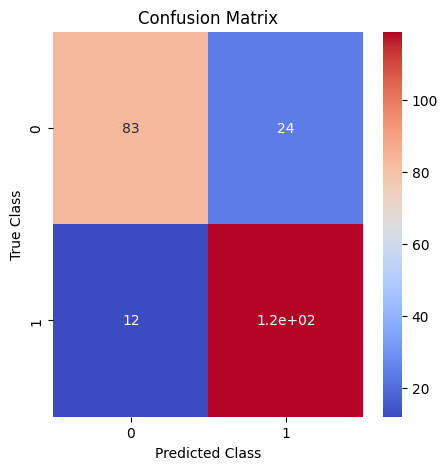

Precision: 0.8321678321678322
Sensitivity: 0.9083969465648855
Specificity: 0.7757009345794392
F1-score: 0.8686131386861313


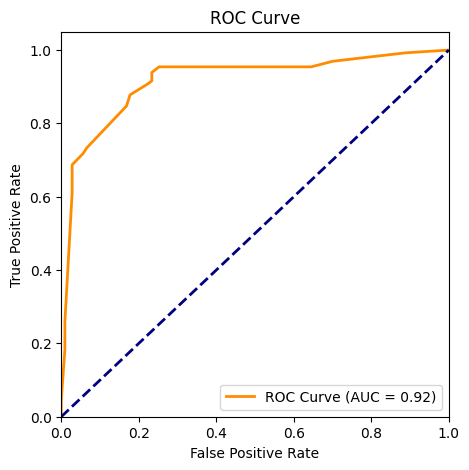

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop_s = ["age", "resting bp s", "cholesterol", "resting ecg", "target"]
columns_to_drop_mw = ["age", "resting bp s", "cholesterol", "resting ecg", "oldpeak", "target"]
X = data.drop(columns_to_drop_mw, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Decision Tree classifier
decision_tree_model = DecisionTreeClassifier(max_depth = 5, random_state=42)
decision_tree_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = decision_tree_model.predict(X_train)
y_test_pred = decision_tree_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

# print the results
print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, decision_tree_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, decision_tree_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**Random Forest**

Training Accuracy: 0.8781512605042017
Testing Accuracy: 0.8907563025210085


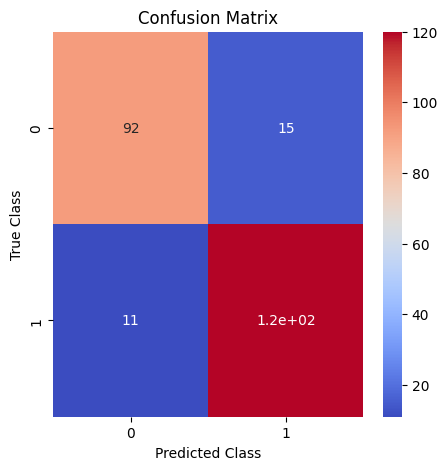

Precision: 0.8888888888888888
Sensitivity: 0.916030534351145
Specificity: 0.8598130841121495
F1-score: 0.9022556390977443


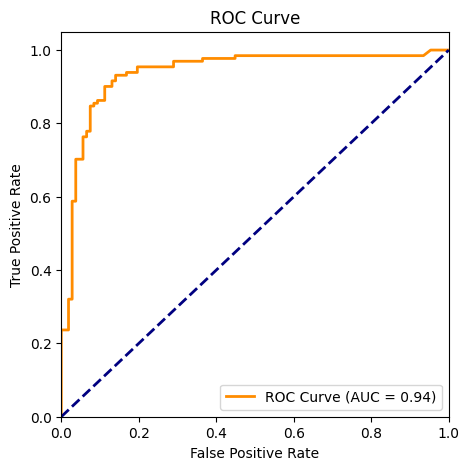

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop_s = ["age", "resting bp s", "cholesterol", "resting ecg", "target"]
columns_to_drop_mw = ["age", "resting bp s", "cholesterol", "resting ecg", "oldpeak", "target"]
X = data.drop(columns_to_drop_s, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest classifier
random_forest_model = RandomForestClassifier(max_depth = 5, n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = random_forest_model.predict(X_train)
y_test_pred = random_forest_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

# Print the results
print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, random_forest_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, random_forest_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**KNN**

Training Accuracy: 0.8707983193277311
Testing Accuracy: 0.8277310924369747


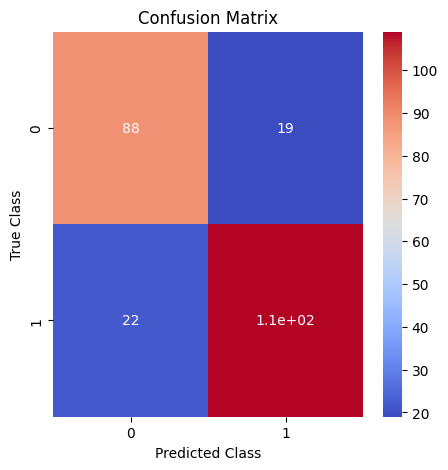

Precision: 0.8515625
Sensitivity: 0.8320610687022901
Specificity: 0.822429906542056
F1-score: 0.8416988416988418


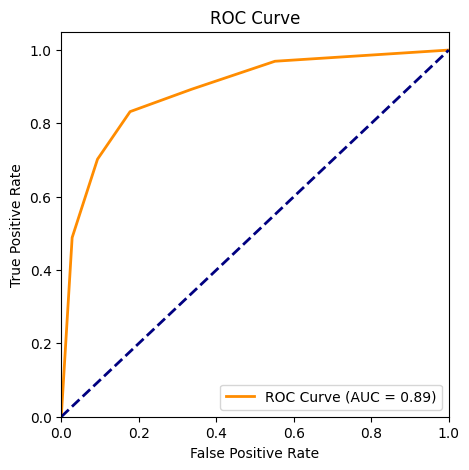

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop_s = ["age", "resting bp s", "cholesterol", "resting ecg", "target"]
columns_to_drop_mw = ["age", "resting bp s", "cholesterol", "resting ecg", "oldpeak", "target"]
X = data.drop(columns_to_drop_mw, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a K-Nearest Neighbors (KNN) classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

# Print the results
print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, knn_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**SVM**

Training Accuracy: 0.8361344537815126
Testing Accuracy: 0.8571428571428571


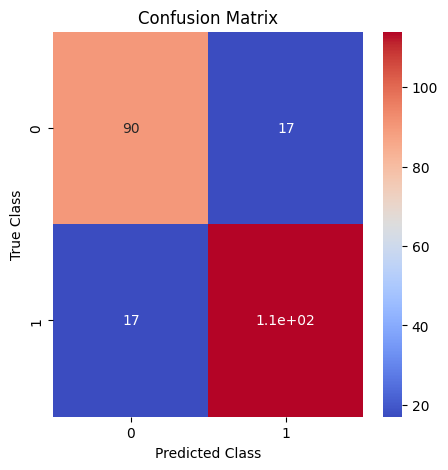

Precision: 0.8702290076335878
Sensitivity: 0.8702290076335878
Specificity: 0.8411214953271028
F1-score: 0.8702290076335878


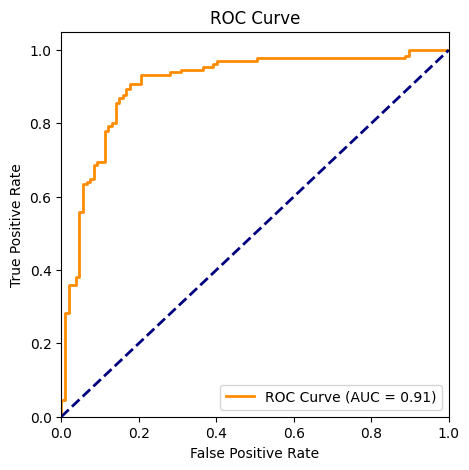

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop_s = ["age", "resting bp s", "cholesterol", "resting ecg", "target"]
columns_to_drop_mw = ["age", "resting bp s", "cholesterol", "resting ecg", "oldpeak", "target"]
X = data.drop(columns_to_drop_s, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Support Vector Machine (SVM) classifier
svm_model = SVC(kernel='linear', C=1.0, random_state=42, probability = True)
svm_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

# Print the results
print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, svm_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, svm_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**Naive Bayes**

Training Accuracy: 0.8235294117647058
Testing Accuracy: 0.8613445378151261


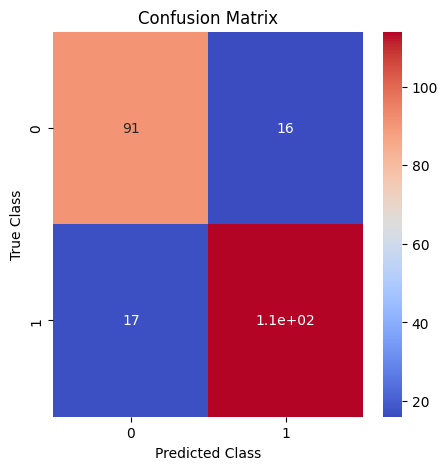

Precision: 0.8769230769230769
Sensitivity: 0.8702290076335878
Specificity: 0.8504672897196262
F1-score: 0.8735632183908046


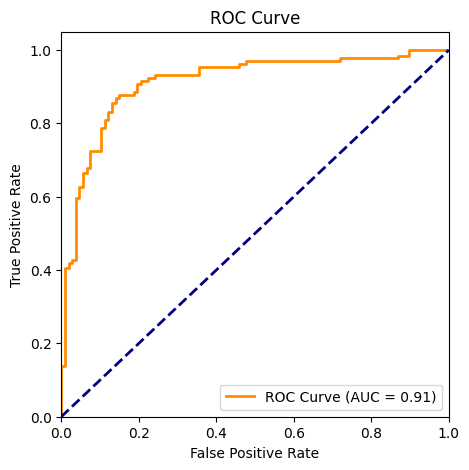

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop_s = ["age", "resting bp s", "cholesterol", "resting ecg", "target"]
columns_to_drop_mw = ["age", "resting bp s", "cholesterol", "resting ecg", "oldpeak", "target"]
X = data.drop(columns_to_drop_s, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Gaussian Naive Bayes classifier
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = naive_bayes_model.predict(X_train)
y_test_pred = naive_bayes_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

# Print the results
print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, naive_bayes_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, naive_bayes_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**MLP**

Training Accuracy: 0.8109243697478992
Testing Accuracy: 0.8109243697478992


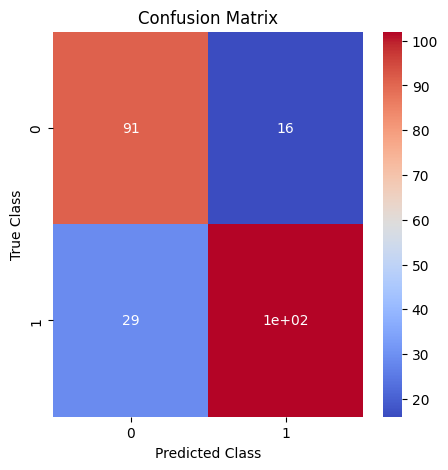

Precision: 0.864406779661017
Sensitivity: 0.7786259541984732
Specificity: 0.8504672897196262
F1-score: 0.8192771084337348


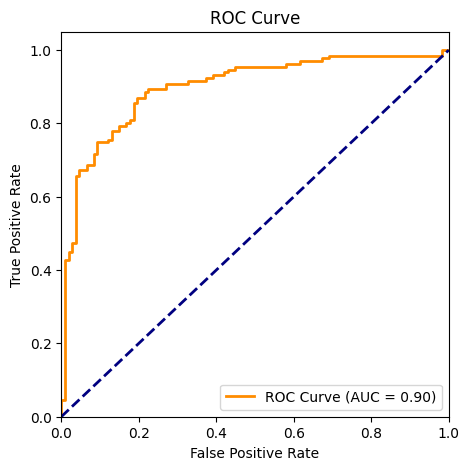

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop_s = ["age", "resting bp s", "cholesterol", "resting ecg", "target"]
columns_to_drop_mw = ["age", "resting bp s", "cholesterol", "resting ecg", "oldpeak", "target"]
X = data.drop(columns_to_drop_s, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train an Artificial Neural Network (ANN) classifier
ann_model = MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=1000, random_state=42)
ann_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = ann_model.predict(X_train)
y_test_pred = ann_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

# Print the results
print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, ann_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, ann_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**XGBoost**

Training Accuracy: 0.9926470588235294
Testing Accuracy: 0.8865546218487395


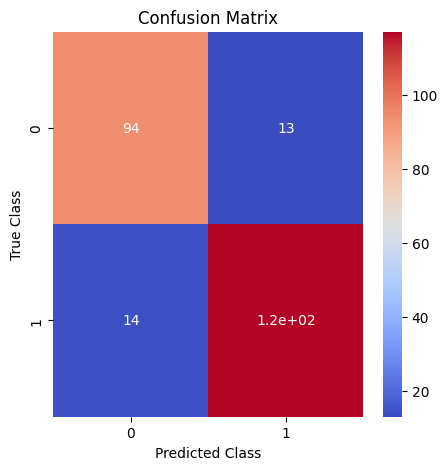

Precision: 0.9
Sensitivity (Recall): 0.8931297709923665
Specificity: 0.8785046728971962
F1-score: 0.8965517241379312


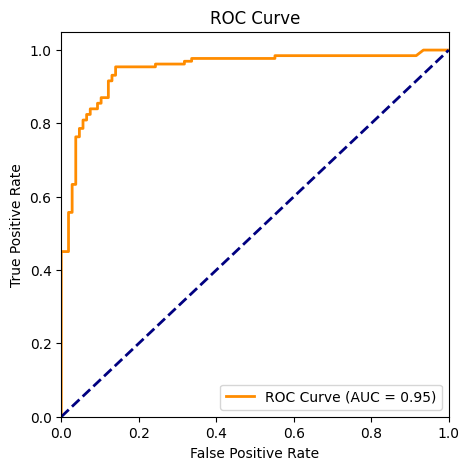

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop_s = ["age", "resting bp s", "cholesterol", "resting ecg", "target"]
columns_to_drop_mw = ["age", "resting bp s", "cholesterol", "resting ecg", "oldpeak", "target"]
X = data.drop(columns_to_drop_s, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train an XGBoost classifier
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = precision_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)
specificity = tn / (tn + fp)
f1_score = f1_score(y_test, y_test_pred)

# Print the results
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Training Accuracy: 0.9758403361344538
Testing Accuracy: 0.9033613445378151


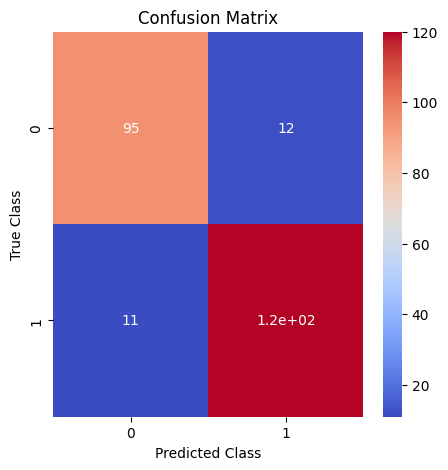

Precision: 0.9090909090909091
Sensitivity (Recall): 0.916030534351145
Specificity: 0.8878504672897196
F1-score: 0.9125475285171103


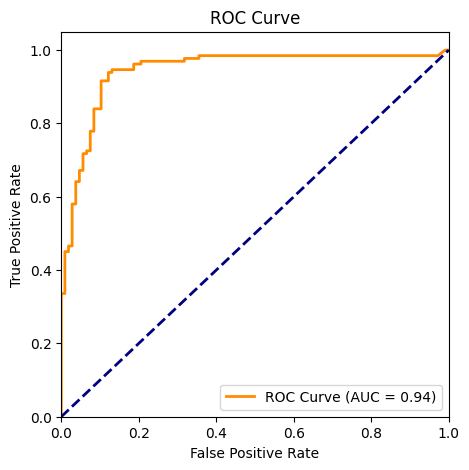

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop_s = ["age", "resting bp s", "cholesterol", "resting ecg", "target"]
columns_to_drop_mw = ["age", "resting bp s", "cholesterol", "resting ecg", "oldpeak", "target"]
X = data.drop(columns_to_drop_s, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train an XGBoost classifier with overfitting mitigation techniques
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=5,  # Limit tree depth
    min_child_weight=1,  # Minimum sum of instance weight (hessian) needed in a child
    gamma=0,  # Minimum loss reduction required to make a further partition on a leaf node
    subsample=0.8,  # Fraction of samples used for training
    colsample_bytree=0.8,  # Fraction of features used for training
    reg_alpha=0.1,  # L1 regularization term on weights
    reg_lambda=1.0  # L2 regularization term on weights
)
xgb_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = precision_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)
specificity = tn / (tn + fp)
f1_score = f1_score(y_test, y_test_pred)

# Print the results
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**AdaBoost**

Training Accuracy: 0.8508403361344538
Testing Accuracy: 0.8739495798319328


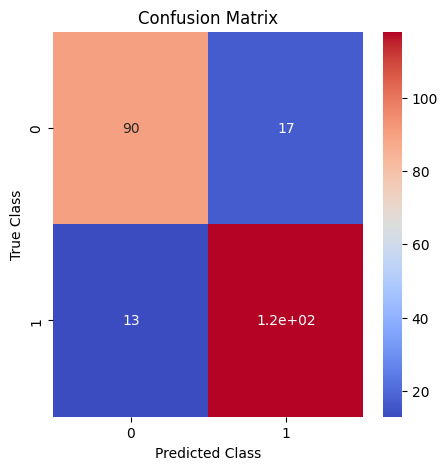

Precision: 0.8740740740740741
Sensitivity (Recall): 0.9007633587786259
Specificity: 0.8411214953271028
F1-score: 0.8872180451127819


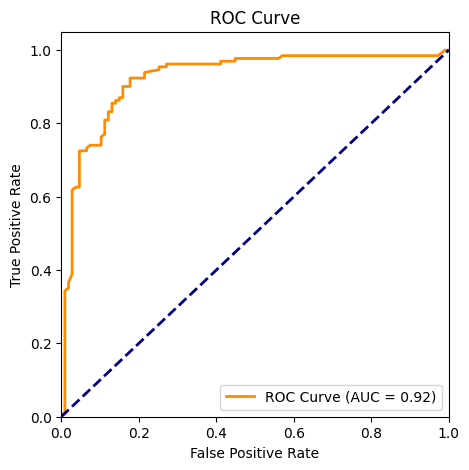

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop_s = ["age", "resting bp s", "cholesterol", "resting ecg", "target"]
columns_to_drop_mw = ["age", "resting bp s", "cholesterol", "resting ecg", "oldpeak", "target"]
X = data.drop(columns_to_drop_mw, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train an AdaBoost classifier
adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = adaboost_model.predict(X_train)
y_test_pred = adaboost_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = precision_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)
specificity = tn / (tn + fp)
f1_score = f1_score(y_test, y_test_pred)

# Print the results
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, adaboost_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, adaboost_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**Stochastic Gradient Classifier**

Training Accuracy: 0.8025210084033614
Testing Accuracy: 0.8235294117647058


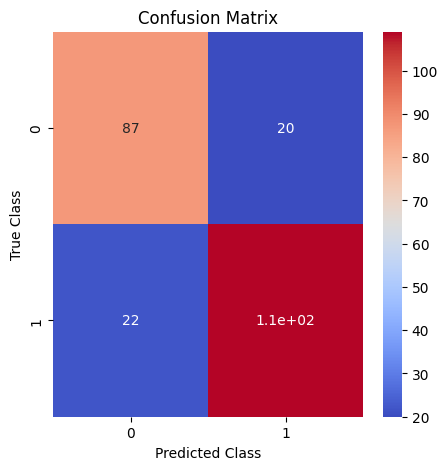

Precision: 0.8449612403100775
Sensitivity (Recall): 0.8320610687022901
Specificity: 0.8130841121495327
F1-score: 0.8384615384615384


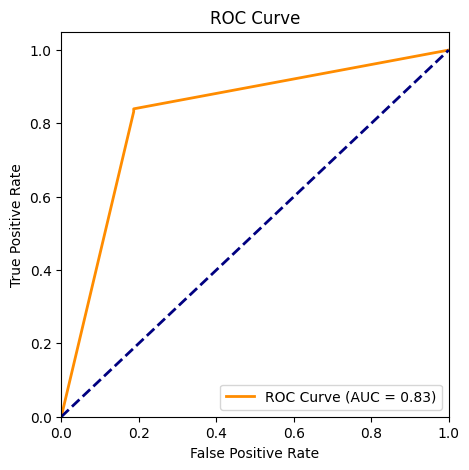

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop_s = ["age", "resting bp s", "cholesterol", "resting ecg", "target"]
columns_to_drop_mw = ["age", "resting bp s", "cholesterol", "resting ecg", "oldpeak", "target"]
X = data.drop(columns_to_drop_s, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train an SGD Classifier
sgd_model = SGDClassifier(loss = "modified_huber", random_state=42)
sgd_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = sgd_model.predict(X_train)
y_test_pred = sgd_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = precision_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)
specificity = tn / (tn + fp)
f1_score = f1_score(y_test, y_test_pred)

# Print the results
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, sgd_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, sgd_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Training Accuracy: 0.7941176470588235
Testing Accuracy: 0.7899159663865546


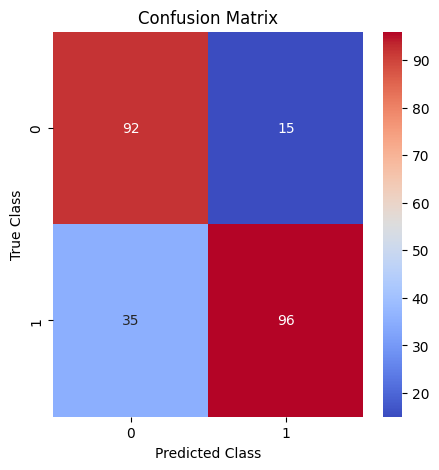

Precision: 0.8648648648648649
Sensitivity (Recall): 0.732824427480916
Specificity: 0.8598130841121495
F1-score: 0.7933884297520661


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop_s = ["age", "resting bp s", "cholesterol", "resting ecg", "target"]
columns_to_drop_mw = ["age", "resting bp s", "cholesterol", "resting ecg", "oldpeak", "target"]
X = data.drop(columns_to_drop_s, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and customize an SGD Classifier
sgd_model = SGDClassifier(
    loss="log",  # The loss function (hinge for linear SVM)
    penalty="l2",  # Regularization term (l2 for Ridge regularization)
    alpha=0.001,  # Regularization strength
    max_iter=1000,  # Maximum number of iterations
    random_state=42
)

sgd_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = sgd_model.predict(X_train)
y_test_pred = sgd_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = precision_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)
specificity = tn / (tn + fp)
f1_score = f1_score(y_test, y_test_pred)

# Print the results
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)


**Gradient Boosting Classifier**

Training Accuracy: 0.9831932773109243
Testing Accuracy: 0.9033613445378151


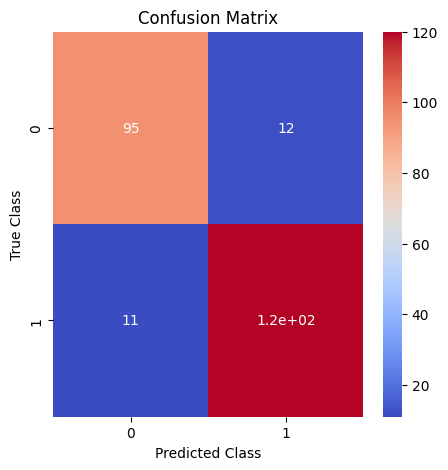

Precision: 0.9090909090909091
Sensitivity (Recall): 0.916030534351145
Specificity: 0.8878504672897196
F1-score: 0.9125475285171103


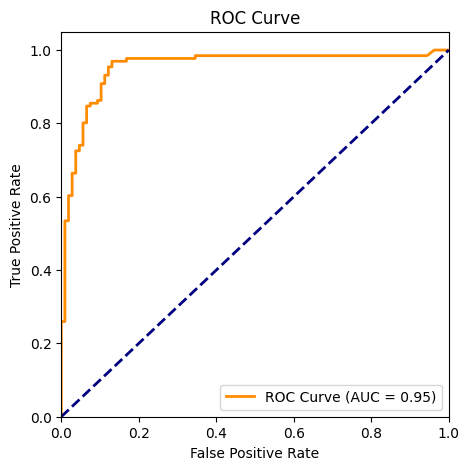

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop_s = ["age", "resting bp s", "cholesterol", "resting ecg", "target"]
columns_to_drop_mw = ["age", "resting bp s", "cholesterol", "resting ecg", "oldpeak", "target"]
X = data.drop(columns_to_drop_s, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and customize a Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(
    n_estimators=100,  # Number of boosting stages to be used
    max_depth=5,       # Maximum depth of individual trees
    random_state=42
)

gb_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = gb_model.predict(X_train)
y_test_pred = gb_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = precision_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)
specificity = tn / (tn + fp)
f1_score = f1_score(y_test, y_test_pred)

# Print the results
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, gb_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, gb_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**Extra Tree Classifier**

Training Accuracy: 0.8560924369747899
Testing Accuracy: 0.8697478991596639


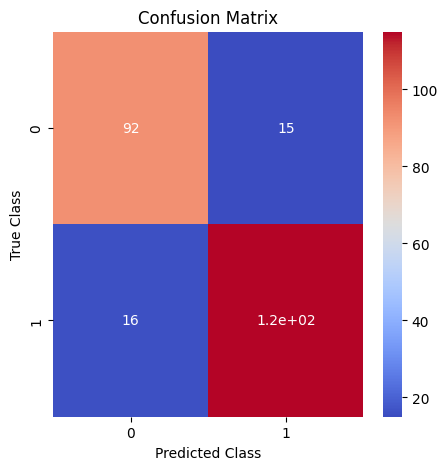

Precision: 0.8846153846153846
Sensitivity (Recall): 0.8778625954198473
Specificity: 0.8598130841121495
F1-score: 0.8812260536398467


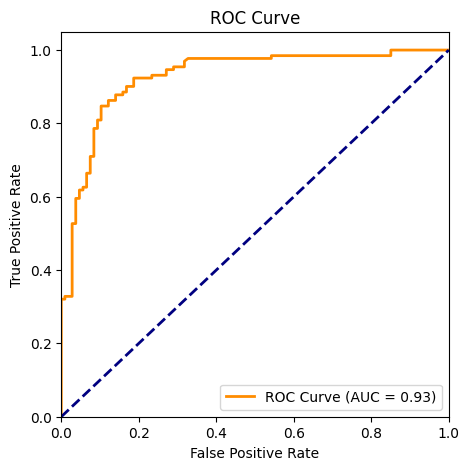

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop_s = ["age", "resting bp s", "cholesterol", "resting ecg", "target"]
columns_to_drop_mw = ["age", "resting bp s", "cholesterol", "resting ecg", "oldpeak", "target"]
X = data.drop(columns_to_drop_s, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and customize an Extra Trees Classifier
extra_trees_model = ExtraTreesClassifier(
    n_estimators=100,  # Number of trees in the forest
    max_depth=5,       # Maximum depth of individual trees
    random_state=42
)

extra_trees_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = extra_trees_model.predict(X_train)
y_test_pred = extra_trees_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = precision_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)
specificity = tn / (tn + fp)
f1_score = f1_score(y_test, y_test_pred)

# Print the results
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, extra_trees_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, extra_trees_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**RNN**

Epoch 1/100
24/24 - 4s - loss: 0.4572 - accuracy: 0.8108 - val_loss: 0.4862 - val_accuracy: 0.8063 - 4s/epoch - 164ms/step
Epoch 2/100
24/24 - 0s - loss: 0.3827 - accuracy: 0.8436 - val_loss: 0.4839 - val_accuracy: 0.8115 - 155ms/epoch - 6ms/step
Epoch 3/100
24/24 - 0s - loss: 0.3732 - accuracy: 0.8449 - val_loss: 0.4672 - val_accuracy: 0.8063 - 156ms/epoch - 6ms/step
Epoch 4/100
24/24 - 0s - loss: 0.3686 - accuracy: 0.8463 - val_loss: 0.4838 - val_accuracy: 0.7801 - 150ms/epoch - 6ms/step
Epoch 5/100
24/24 - 0s - loss: 0.3625 - accuracy: 0.8410 - val_loss: 0.4719 - val_accuracy: 0.8010 - 137ms/epoch - 6ms/step
Epoch 6/100
24/24 - 0s - loss: 0.3583 - accuracy: 0.8476 - val_loss: 0.4713 - val_accuracy: 0.7958 - 152ms/epoch - 6ms/step
Epoch 7/100
24/24 - 0s - loss: 0.3547 - accuracy: 0.8528 - val_loss: 0.4665 - val_accuracy: 0.8063 - 156ms/epoch - 7ms/step
Epoch 8/100
24/24 - 0s - loss: 0.3494 - accuracy: 0.8528 - val_loss: 0.4758 - val_accuracy: 0.8168 - 144ms/epoch - 6ms/step
Epoch 9/1

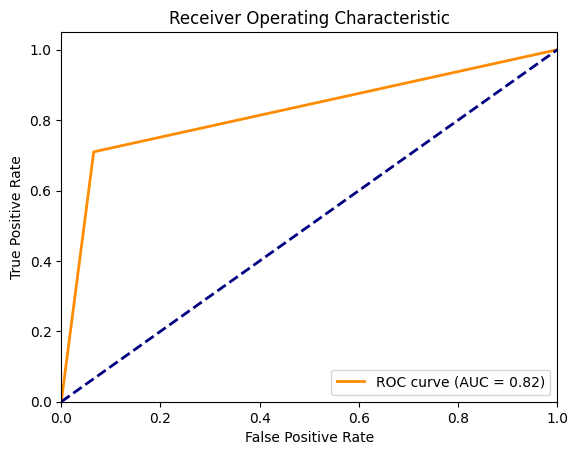

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)
tf.random.set_seed(0)

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop_s = ["age", "resting bp s", "cholesterol", "resting ecg", "target"]
columns_to_drop_mw = ["age", "resting bp s", "cholesterol", "resting ecg", "oldpeak", "target"]
X = data.drop(columns_to_drop_mw, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Reshape the data for SimpleRNN input (assuming a sequence length of 1)
X_train = X_train.reshape(-1, 1, X_train.shape[1])
X_test = X_test.reshape(-1, 1, X_test.shape[1])

# Initialize and configure the RNN model using SimpleRNN
model = keras.Sequential([
    layers.SimpleRNN(128, return_sequences=True, activation='relu', input_shape=(1, X_train.shape[2])),
    layers.SimpleRNN(64, return_sequences=True),
    layers.SimpleRNN(32),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print("Test Accuracy:", test_accuracy)

# Make predictions on the test set
y_test_pred = model.predict(X_test)
y_test_pred = (y_test_pred > 0.8).astype(int)

# Calculate performance metrics
conf_mat = confusion_matrix(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)
specificity = conf_mat[0, 0] / (conf_mat[0, 0] + conf_mat[0, 1])
f1 = f1_score(y_test, y_test_pred)

print("Confusion Matrix:\n", conf_mat)
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


**LSTM**

Epoch 1/100
24/24 - 7s - loss: 0.6867 - accuracy: 0.7175 - val_loss: 0.6760 - val_accuracy: 0.6911 - 7s/epoch - 312ms/step
Epoch 2/100
24/24 - 0s - loss: 0.6154 - accuracy: 0.8134 - val_loss: 0.5522 - val_accuracy: 0.7539 - 242ms/epoch - 10ms/step
Epoch 3/100
24/24 - 0s - loss: 0.4552 - accuracy: 0.8384 - val_loss: 0.4923 - val_accuracy: 0.7696 - 258ms/epoch - 11ms/step
Epoch 4/100
24/24 - 0s - loss: 0.4051 - accuracy: 0.8344 - val_loss: 0.4884 - val_accuracy: 0.7906 - 291ms/epoch - 12ms/step
Epoch 5/100
24/24 - 0s - loss: 0.3892 - accuracy: 0.8344 - val_loss: 0.4874 - val_accuracy: 0.7696 - 241ms/epoch - 10ms/step
Epoch 6/100
24/24 - 0s - loss: 0.3811 - accuracy: 0.8423 - val_loss: 0.4855 - val_accuracy: 0.7853 - 303ms/epoch - 13ms/step
Epoch 7/100
24/24 - 0s - loss: 0.3767 - accuracy: 0.8436 - val_loss: 0.4821 - val_accuracy: 0.7853 - 266ms/epoch - 11ms/step
Epoch 8/100
24/24 - 0s - loss: 0.3729 - accuracy: 0.8476 - val_loss: 0.4869 - val_accuracy: 0.7801 - 289ms/epoch - 12ms/step
Ep

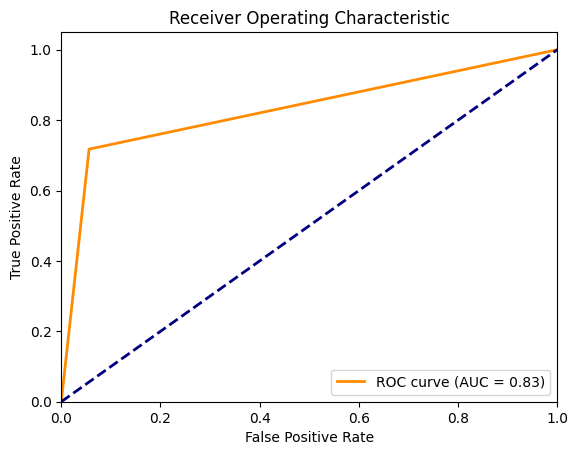

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)
tf.random.set_seed(0)

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop_s = ["age", "resting bp s", "cholesterol", "resting ecg", "target"]
columns_to_drop_mw = ["age", "resting bp s", "cholesterol", "resting ecg", "oldpeak", "target"]
X = data.drop(columns_to_drop_mw, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Reshape the data for LSTM input (assuming a sequence length of 1)
X_train = X_train.reshape(-1, 1, X_train.shape[1])
X_test = X_test.reshape(-1, 1, X_test.shape[1])

# Initialize and configure the LSTM model
model = keras.Sequential([
    layers.LSTM(128, return_sequences=True, activation='relu', input_shape=(1, X_train.shape[2])),
    layers.LSTM(64, return_sequences=True),
    layers.LSTM(32),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print("Test Accuracy:", test_accuracy)

# Make predictions on the test set
y_test_pred = model.predict(X_test)
y_test_pred = (y_test_pred > 0.8).astype(int)

# Calculate performance metrics
conf_mat = confusion_matrix(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)
specificity = conf_mat[0, 0] / (conf_mat[0, 0] + conf_mat[0, 1])
f1 = f1_score(y_test, y_test_pred)

print("Confusion Matrix:\n", conf_mat)
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


**GRU**

Epoch 1/100
24/24 - 7s - loss: 0.6493 - accuracy: 0.7898 - val_loss: 0.5866 - val_accuracy: 0.7539 - 7s/epoch - 308ms/step
Epoch 2/100
24/24 - 0s - loss: 0.4541 - accuracy: 0.8357 - val_loss: 0.4884 - val_accuracy: 0.7906 - 239ms/epoch - 10ms/step
Epoch 3/100
24/24 - 0s - loss: 0.3915 - accuracy: 0.8331 - val_loss: 0.4819 - val_accuracy: 0.7853 - 228ms/epoch - 9ms/step
Epoch 4/100
24/24 - 0s - loss: 0.3814 - accuracy: 0.8463 - val_loss: 0.4801 - val_accuracy: 0.7853 - 235ms/epoch - 10ms/step
Epoch 5/100
24/24 - 0s - loss: 0.3736 - accuracy: 0.8436 - val_loss: 0.4776 - val_accuracy: 0.7644 - 232ms/epoch - 10ms/step
Epoch 6/100
24/24 - 0s - loss: 0.3690 - accuracy: 0.8476 - val_loss: 0.4762 - val_accuracy: 0.7906 - 239ms/epoch - 10ms/step
Epoch 7/100
24/24 - 0s - loss: 0.3658 - accuracy: 0.8476 - val_loss: 0.4709 - val_accuracy: 0.7906 - 244ms/epoch - 10ms/step
Epoch 8/100
24/24 - 0s - loss: 0.3628 - accuracy: 0.8449 - val_loss: 0.4793 - val_accuracy: 0.7853 - 229ms/epoch - 10ms/step
Epo

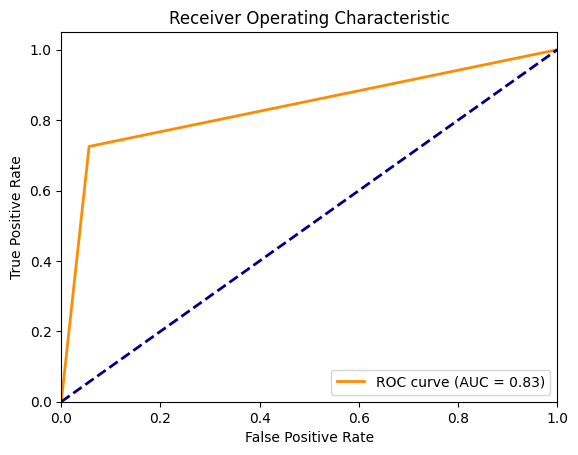

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)
tf.random.set_seed(0)

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop_s = ["age", "resting bp s", "cholesterol", "resting ecg", "target"]
columns_to_drop_mw = ["age", "resting bp s", "cholesterol", "resting ecg", "oldpeak", "target"]
X = data.drop(columns_to_drop_mw, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Reshape the data for GRU input (assuming a sequence length of 1)
X_train = X_train.reshape(-1, 1, X_train.shape[1])
X_test = X_test.reshape(-1, 1, X_test.shape[1])

# Initialize and configure the GRU model
model = keras.Sequential([
    layers.GRU(128, return_sequences=True, activation='relu', input_shape=(1, X_train.shape[2])),
    layers.GRU(64, return_sequences=True),
    layers.GRU(32),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print("Test Accuracy:", test_accuracy)

# Make predictions on the test set
y_test_pred = model.predict(X_test)
y_test_pred = (y_test_pred > 0.8).astype(int)

# Calculate performance metrics
conf_mat = confusion_matrix(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)
specificity = conf_mat[0, 0] / (conf_mat[0, 0] + conf_mat[0, 1])
f1 = f1_score(y_test, y_test_pred)

print("Confusion Matrix:\n", conf_mat)
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


**BiLSTM**

Epoch 1/100
24/24 - 11s - loss: 0.6855 - accuracy: 0.7411 - val_loss: 0.6727 - val_accuracy: 0.7277 - 11s/epoch - 443ms/step
Epoch 2/100
24/24 - 0s - loss: 0.5872 - accuracy: 0.8292 - val_loss: 0.5051 - val_accuracy: 0.7539 - 363ms/epoch - 15ms/step
Epoch 3/100
24/24 - 0s - loss: 0.4158 - accuracy: 0.8357 - val_loss: 0.5003 - val_accuracy: 0.7853 - 364ms/epoch - 15ms/step
Epoch 4/100
24/24 - 0s - loss: 0.3935 - accuracy: 0.8397 - val_loss: 0.4816 - val_accuracy: 0.7644 - 373ms/epoch - 16ms/step
Epoch 5/100
24/24 - 0s - loss: 0.3843 - accuracy: 0.8397 - val_loss: 0.4822 - val_accuracy: 0.7644 - 368ms/epoch - 15ms/step
Epoch 6/100
24/24 - 0s - loss: 0.3793 - accuracy: 0.8410 - val_loss: 0.4800 - val_accuracy: 0.7906 - 335ms/epoch - 14ms/step
Epoch 7/100
24/24 - 0s - loss: 0.3744 - accuracy: 0.8449 - val_loss: 0.4782 - val_accuracy: 0.7749 - 336ms/epoch - 14ms/step
Epoch 8/100
24/24 - 0s - loss: 0.3716 - accuracy: 0.8449 - val_loss: 0.4848 - val_accuracy: 0.7853 - 320ms/epoch - 13ms/step


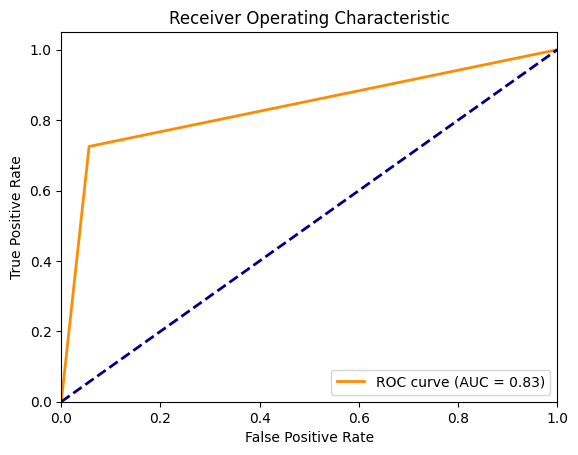

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)
tf.random.set_seed(0)

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop_s = ["age", "resting bp s", "cholesterol", "resting ecg", "target"]
columns_to_drop_mw = ["age", "resting bp s", "cholesterol", "resting ecg", "oldpeak", "target"]
X = data.drop(columns_to_drop_mw, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Reshape the data for BiLSTM input (assuming a sequence length of 1)
X_train = X_train.reshape(-1, 1, X_train.shape[1])
X_test = X_test.reshape(-1, 1, X_test.shape[1])

# Initialize and configure the BiLSTM model
model = keras.Sequential([
    Bidirectional(layers.LSTM(128, return_sequences=True, activation='relu'), input_shape=(1, X_train.shape[2])),
    Bidirectional(layers.LSTM(64, return_sequences=True, activation='relu')),
    Bidirectional(layers.LSTM(32, activation='relu')),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print("Test Accuracy:", test_accuracy)

# Make predictions on the test set
y_test_pred = model.predict(X_test)
y_test_pred = (y_test_pred > 0.8).astype(int)

# Calculate performance metrics
conf_mat = confusion_matrix(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)
specificity = conf_mat[0, 0] / (conf_mat[0, 0] + conf_mat[0, 1])
f1 = f1_score(y_test, y_test_pred)

print("Confusion Matrix:\n", conf_mat)
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


**BiGRU**

Epoch 1/100
24/24 - 12s - loss: 0.6262 - accuracy: 0.8147 - val_loss: 0.5365 - val_accuracy: 0.7644 - 12s/epoch - 499ms/step
Epoch 2/100
24/24 - 0s - loss: 0.4191 - accuracy: 0.8279 - val_loss: 0.5071 - val_accuracy: 0.7696 - 319ms/epoch - 13ms/step
Epoch 3/100
24/24 - 0s - loss: 0.3809 - accuracy: 0.8463 - val_loss: 0.4746 - val_accuracy: 0.8010 - 297ms/epoch - 12ms/step
Epoch 4/100
24/24 - 0s - loss: 0.3743 - accuracy: 0.8305 - val_loss: 0.4945 - val_accuracy: 0.7592 - 342ms/epoch - 14ms/step
Epoch 5/100
24/24 - 0s - loss: 0.3705 - accuracy: 0.8423 - val_loss: 0.4737 - val_accuracy: 0.7958 - 335ms/epoch - 14ms/step
Epoch 6/100
24/24 - 0s - loss: 0.3614 - accuracy: 0.8502 - val_loss: 0.4740 - val_accuracy: 0.8010 - 297ms/epoch - 12ms/step
Epoch 7/100
24/24 - 0s - loss: 0.3560 - accuracy: 0.8502 - val_loss: 0.4714 - val_accuracy: 0.7749 - 337ms/epoch - 14ms/step
Epoch 8/100
24/24 - 0s - loss: 0.3500 - accuracy: 0.8489 - val_loss: 0.4742 - val_accuracy: 0.8115 - 302ms/epoch - 13ms/step


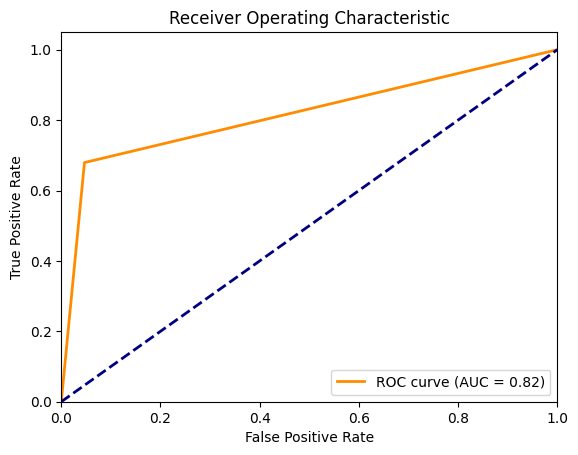

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)
tf.random.set_seed(0)

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop_s = ["age", "resting bp s", "cholesterol", "resting ecg", "target"]
columns_to_drop_mw = ["age", "resting bp s", "cholesterol", "resting ecg", "oldpeak", "target"]
X = data.drop(columns_to_drop_mw, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Reshape the data for BiLSTM input (assuming a sequence length of 1)
X_train = X_train.reshape(-1, 1, X_train.shape[1])
X_test = X_test.reshape(-1, 1, X_test.shape[1])

# Initialize and configure the BiLSTM model
model = keras.Sequential([
    Bidirectional(layers.GRU(128, return_sequences=True, activation='relu'), input_shape=(1, X_train.shape[2])),
    Bidirectional(layers.GRU(64, return_sequences=True, activation='relu')),
    Bidirectional(layers.GRU(32, activation='relu')),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print("Test Accuracy:", test_accuracy)

# Make predictions on the test set
y_test_pred = model.predict(X_test)
y_test_pred = (y_test_pred > 0.8).astype(int)

# Calculate performance metrics
conf_mat = confusion_matrix(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)
specificity = conf_mat[0, 0] / (conf_mat[0, 0] + conf_mat[0, 1])
f1 = f1_score(y_test, y_test_pred)

print("Confusion Matrix:\n", conf_mat)
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


**CatBoost**

0:	learn: 0.5239868	test: 0.5250094	best: 0.5250094 (0)	total: 54.8ms	remaining: 5.42s
10:	learn: 0.2925793	test: 0.3364194	best: 0.3343833 (9)	total: 65.7ms	remaining: 532ms
20:	learn: 0.2499492	test: 0.3307703	best: 0.3305764 (19)	total: 75.2ms	remaining: 283ms
30:	learn: 0.2325903	test: 0.3328163	best: 0.3297209 (23)	total: 80.8ms	remaining: 180ms
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.3297208991
bestIteration = 23

Shrink model to first 24 iterations.
Test Accuracy: 0.8067226890756303
Precision: 0.9292929292929293
Sensitivity (Recall): 0.7022900763358778
Specificity: 0.9345794392523364
F1 Score: 0.7999999999999998
Confusion Matrix:
[[100   7]
 [ 39  92]]


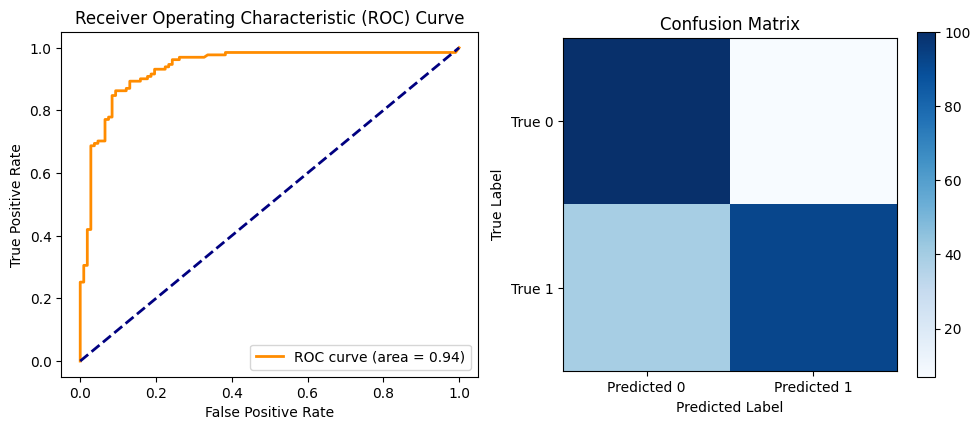

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop_s = ["age", "resting bp s", "cholesterol", "resting ecg", "target"]
columns_to_drop_mw = ["age", "resting bp s", "cholesterol", "resting ecg", "oldpeak", "target"]
X = data.drop(columns_to_drop_s, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Create and train the CatBoost model
cat_features = []  # You can specify categorical features here
model = CatBoostClassifier(iterations=100, depth=7, learning_rate=0.5, loss_function='Logloss', random_seed=0)

model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=10, verbose=10)

# Make predictions on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba > 0.8).astype("int32")

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Test Accuracy:", test_accuracy)
print("Precision:", precision)
print("Sensitivity (Recall):", recall)
print("Specificity:", confusion_matrix(y_test, y_pred)[0, 0] / (confusion_matrix(y_test, y_pred)[0, 0] + confusion_matrix(y_test, y_pred)[0, 1]))
print("F1 Score:", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# ROC Curve with AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Display confusion matrix
plt.subplot(2, 2, 2)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['Predicted 0', 'Predicted 1'])
plt.yticks([0, 1], ['True 0', 'True 1'])

plt.tight_layout()
plt.show()

**LightGBM**

/opt/conda/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[10]	valid_0's binary_logloss: 0.321972
[20]	valid_0's binary_logloss: 0.306233
[30]	valid_0's binary_logloss: 0.309963
Test Accuracy: 0.8529411764705882
Precision: 0.9528301886792453
Sensitivity (Recall): 0.7709923664122137
Specificity: 0.9532710280373832
F1 Score: 0.8523206751054853
Confusion Matrix:
[[102   5]
 [ 30 101]]


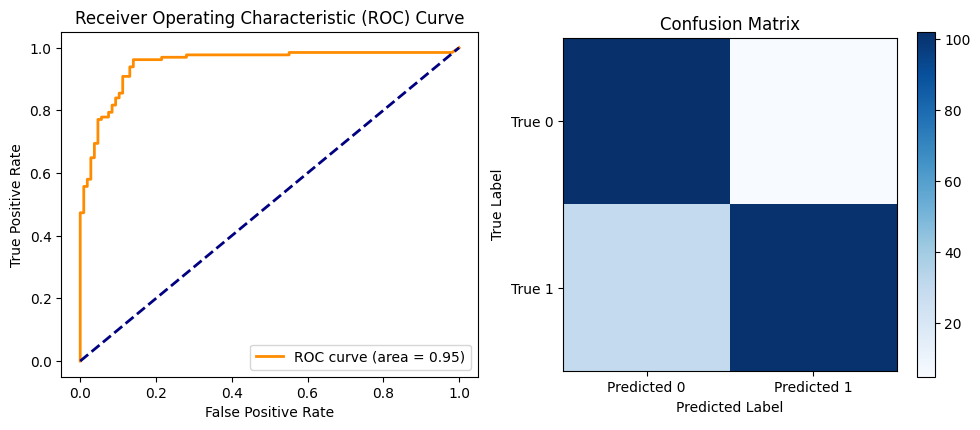

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop_s = ["age", "resting bp s", "cholesterol", "resting ecg", "target"]
columns_to_drop_mw = ["age", "resting bp s", "cholesterol", "resting ecg", "oldpeak", "target"]
X = data.drop(columns_to_drop_s, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Create and train the LightGBM model
model = LGBMClassifier(n_estimators=100, max_depth=7, learning_rate=0.5, random_state=42, boosting_type='gbdt')

model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=10, verbose=10)

# Make predictions on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba > 0.8).astype("int32")

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Test Accuracy:", test_accuracy)
print("Precision:", precision)
print("Sensitivity (Recall):", recall)
print("Specificity:", confusion_matrix(y_test, y_pred)[0, 0] / (confusion_matrix(y_test, y_pred)[0, 0] + confusion_matrix(y_test, y_pred)[0, 1]))
print("F1 Score:", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# ROC Curve with AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Display confusion matrix
plt.subplot(2, 2, 2)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['Predicted 0', 'Predicted 1'])
plt.yticks([0, 1], ['True 0', 'True 1'])

plt.tight_layout()
plt.show()